<a href="https://colab.research.google.com/github/ghliddy/assignment-5/blob/main/Liddy_Grossman_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ENVS110a-SP23/assignment-5/main/data/tidal_wetland_estuaries.csv')

df.head()

,name,coast,estu_latitude,estu_longintude,estu_dep,estu_perim,land_area,land_latitude,land_longitude,population,...,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
0,Florida Bay,GULF,25.039940,-80.731770,0.62000,614000.000,9.048954e+08,25.187310,-80.727540,3421,...,36.2,24.4,0.0,26.50,0.07,0.810,1.000000e+09,1251.831801,24.594719,0.087
1,South Ten Thousand Islands,GULF,25.311330,-81.057020,0.63000,597000.000,3.069216e+09,25.440250,-80.791070,235792,...,36.1,24.6,0.0,26.40,0.08,0.780,3.000000e+08,1355.907147,24.320596,0.000
2,North Ten Thousand Islands,GULF,25.724280,-81.377640,0.73000,906000.000,4.921106e+09,25.982520,-81.273680,9268,...,36.0,24.1,0.0,26.30,0.09,0.790,6.000000e+08,1416.239789,23.873671,0.084
3,Rookery Bay,GULF,25.998750,-81.756010,0.50000,148000.000,3.304589e+08,26.042920,-81.677710,14858,...,36.0,23.9,0.0,26.10,0.08,0.670,4.000000e+07,1432.519416,23.510000,0.086
4,Charlotte Harbor,GULF,26.754031,-82.103018,1.65938,507261.119,1.169284e+10,27.167615,-81.772154,597644,...,35.9,23.2,1.0,25.65,0.10,0.545,7.000000e+08,1320.275690,22.869199,0.073


In [ ]:
df = df.replace(-9999., np.NaN)
df

df_sub = df.drop(columns=["estu_latitude", "estu_longintude", "estu_dep", "estu_perim", "land_area", "land_latitude", "land_longitude", "population"])
df_sub.corr()

<ipython-input-13-783a46743add>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,tide_ht,estu_salinity,ocean_salinity_mean,air_temp_mean,frost_days_per_yr,ocean_sst_mean,ocean_diss_inorg_p,ocean_no3,tide_flow,mean_precip,mean_temp,soc_density
tide_ht,1.000000,0.341248,-0.454109,-0.691815,0.698411,-0.633574,0.548389,0.648145,0.233592,0.062591,-0.713396,0.207793
estu_salinity,0.341248,1.000000,-0.021489,-0.222201,0.237810,-0.265133,0.092095,0.200921,0.123176,-0.359857,-0.191734,-0.113747
ocean_salinity_mean,-0.454109,-0.021489,1.000000,0.818410,-0.670875,0.849060,-0.914380,-0.685855,-0.221568,-0.366668,0.816039,0.069038
air_temp_mean,-0.691815,-0.222201,0.818410,1.000000,-0.921554,0.977726,-0.902654,-0.790280,-0.230462,-0.154438,0.990947,-0.085225
frost_days_per_yr,0.698411,0.237810,-0.670875,-0.921554,1.000000,-0.881502,0.721589,0.864762,0.242841,0.097908,-0.932027,0.258393
ocean_sst_mean,-0.633574,-0.265133,0.849060,0.977726,-0.881502,1.000000,-0.924980,-0.771803,-0.249995,-0.091961,0.962310,-0.017889
ocean_diss_inorg_p,0.548389,0.092095,-0.914380,-0.902654,0.721589,-0.924980,1.000000,0.694866,0.147774,0.254881,-0.889037,-0.104343
ocean_no3,0.648145,0.200921,-0.685855,-0.790280,0.864762,-0.771803,0.694866,1.000000,0.198588,0.188445,-0.814337,0.200979
tide_flow,0.233592,0.123176,-0.221568,-0.230462,0.242841,-0.249995,0.147774,0.198588,1.000000,-0.041062,-0.238323,0.220506
mean_precip,0.062591,-0.359857,-0.366668,-0.154438,0.097908,-0.091961,0.254881,0.188445,-0.041062,1.000000,-0.206883,0.199162


In [ ]:
df_east = df.loc[(df['coast'] == "EAST"),:]
df_west = df.loc[(df['coast']== "WEST"),:]

stats.ttest_ind(df_east['soc_density'], df_west['soc_density'], alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=8.45031778669312, pvalue=1.1530568956025485e-12)

I used a 2 sample T test in order to compare the two separate samples. This is used for comparing the means of two different sets of data.

The data is considered not normal because the p value is smaller than 0.05.

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity
    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
        Source url: https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:
        a. residual
        b. qq
        c. scale location and
        d. leverage
        and a table
        e. vif
        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object
        Raises:
            TypeError: if instance does not belong to above object
        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")
        In case you do not need all plots you can also independently make an individual plot/table
        in following ways
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot
        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot
        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot
        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot
        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table
        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

<ipython-input-14-7c6c05a87e05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sub.corr(), annot=True, cmap = "RdBu_r", vmin=-1, vmax=1)


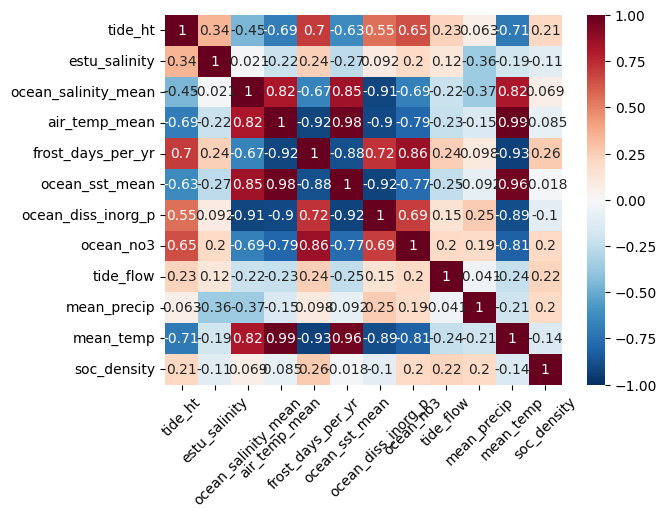

In [ ]:
sns.heatmap(df_sub.corr(), annot=True, cmap = "RdBu_r", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
model = smf.ols(formula="ocean_salinity_mean ~ tide_ht  + estu_salinity  + ocean_diss_inorg_p + ocean_no3 + tide_flow + mean_precip +  soc_density", data=df_sub).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       0.879
Model:                             OLS   Adj. R-squared:                  0.871
Method:                  Least Squares   F-statistic:                     109.8
Date:                 Sat, 29 Apr 2023   Prob (F-statistic):           1.27e-45
Time:                         18:00:18   Log-Likelihood:                -97.043
No. Observations:                  114   AIC:                             210.1
Df Residuals:                      106   BIC:                             232.0
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             36.7530      0.334    110.086      0.000      36.091      37.415
tide_ht                0.1962      0.083      2.356      0.020       0.031       0.361
estu_salinity          0.0026      0.009      0.301      0.764      -0.015       0.020
ocean_diss_inorg_p    -7.4929      0.503    -14.908      0.000      -8.489      -6.496
ocean_no3             -0.2116      0.073     -2.894      0.005      -0.357      -0.067
tide_flow          -9.529e-11   2.95e-11     -3.235      0.002   -1.54e-10   -3.69e-11
mean_precip           -0.0005      0.000     -3.767      0.000      -0.001      -0.000
soc_density            2.6217      2.342      1.120      0.265      -2.021       7.264
==============================================================================
Omnibus:                        3.393   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.352
Skew:                           0.412   Prob(JB):                        0.187
Kurtosis:                       2.841   Cond. No.                     9.55e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.55e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
diag = Linear_Reg_Diagnostic(model)
diag.vif_table()


             Features  VIF Factor
5           tide_flow        1.12
6         mean_precip        1.33
7         soc_density        1.42
2       estu_salinity        1.42
1             tide_ht        2.11
3  ocean_diss_inorg_p        2.57
4           ocean_no3        2.66
0           Intercept       36.77


The R-Squared value in the model shows that the independent variables can explain a high percentage of the variance in the dependent variable. The regression coefficents for tide_ht and estu_salinity are positive, meaning that there is a strong correlation between the independent and dependent variable. The other independent variables are negative, meaning that there is a weaking correlation.

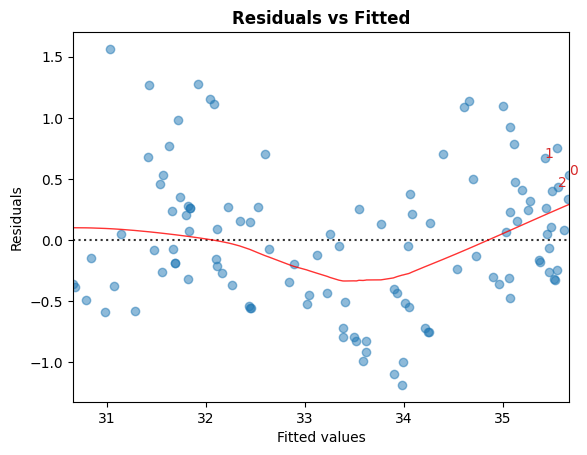

In [ ]:
plot = Linear_Reg_Diagnostic(model)
plot.residual_plot();

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ENVS110a-SP23/assignment-5/main/data/coal-production.csv')

df2.head()

,year,electricity_prod
0,1960,45.904345
1,1961,45.730794
2,1962,46.411172
3,1963,46.599523
4,1964,46.102588


In [ ]:
df2['year'] = pd.to_datetime(df2['year'], format='%Y')
df2 = df2.set_index('year').sort_index()
df2.head()

,electricity_prod
year,
1960-01-01,45.904345
1961-01-01,45.730794
1962-01-01,46.411172
1963-01-01,46.599523
1964-01-01,46.102588


In [ ]:
y_diff = df2['electricity_prod'].diff().dropna()

ma_model = ARIMA(y_diff, order=(0,0,1)).fit()

print(ma_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       electricity_prod   No. Observations:                   55
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -71.793
Date:                Wed, 03 May 2023   AIC                            149.586
Time:                        16:45:05   BIC                            155.608
Sample:                    01-01-1961   HQIC                           151.914
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3241      0.151     -2.145      0.032      -0.620      -0.028
ma.L1          0.2497      0.120      2.089      0.037       0.015       0.484
sigma2         0.7958      0.169      4.709      0.0

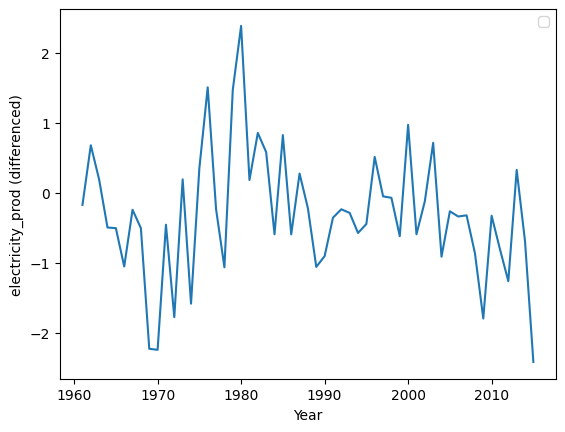

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_diff)
ax.set_xlabel('Year')
ax.set_ylabel('electricity_prod (differenced)')
ax.legend();

There will be a relative decrease in energy production from coal fired plants in the next 25 years.